## Telecom Customer Churn prediction

The dataset contains churn data of customers of a telecom company.
It has 3333 observations with features like no. of calls, total bill amount, customer service calls etc..along with the status of customer churn.

Objective is to predict the customers likely to churn based on the user data features.
The entire data will be divided into test,train data and ML models will be trained on train data & predictions will be done on test data.

### Data import & test, train splitting

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the csv file
data = pd.read_csv('telecommunications_churn.csv', delimiter = ";")

# setting the option to display all the columns
pd.set_option('display.max_columns', None)

data.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [4]:
data.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [ ]:
# No null values in dataset.

In [5]:
data.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [261]:
# More than 50% do not have voice mail plan.
# More than 75% do not have international plan.
# More than 75% have churn value as 'zero' ie class imbalance is observed in the target variable.
# Class imbalance observed.

100*data['churn'].value_counts(normalize=True)

# 85.51% vs 14.49%

0    85.508551
1    14.491449
Name: churn, dtype: float64

### Divide the data into train, test data.

In [6]:
from sklearn.model_selection import train_test_split


# target separation

X = data.copy()
y = data[['churn']]

# test, train split of data
# stratify option enabled to make sure both train & test data have same proportion of classes. 

(X_train,X_test,y_train,y_test)= train_test_split(X,y,test_size=0.25, stratify = y,random_state = 100)

print("X_train:", X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (2499, 19)
X_test: (834, 19)
y_train: (2499, 1)
y_test: (834, 1)


In [7]:
data_train = X_train.copy()

## Hypothesis:

1. International plan holders churn more.   
2. Voicemail plan has influence on churn.  
3. Customer service calls has influence on churn.
4. No. of calls('daymins, evngmins,nightmins, internationamins) & Charges(day, evng, night, international, total) also will    influence churn.
5. Higher account lengths may have lower churn rate.

### Statistical tests to test the hypothesis

In [8]:
# International plan holders churn more.

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency 

# NULL Ho: churn is independent of international_plan holders.
# NULL Ha: churn is dependent on international_plan holders.

data_train_table = pd.crosstab(data_train['international_plan'], data_train['churn'])
print(data_train_table)

stat, p, dof, expected_freq = chi2_contingency(data_train_table) 

print('\n ch2 stat:', stat)
print('\n p value:', p)
print('\n degrees of freedom:', dof)
print('\n expected frequencies:', '\n\t', expected_freq[0], '\n\t', expected_freq[1])
 
signi_level = 0.05

#criteria for NUlL rejection.
if p <= signi_level: 
    print('\n REJECT NULL ie Churn is dependent on international plan holders.') 
else: 
    print('\n FAIL TO REJECT NULL ie Churn is independent of international plan holders.')

churn                  0    1
international_plan           
0                   2005  256
1                    132  106

 ch2 stat: 189.11069129931204

 p value: 4.971074327951981e-43

 degrees of freedom: 1

 expected frequencies: 
	 [1933.47619048  327.52380952] 
	 [203.52380952  34.47619048]

 REJECT NULL ie Churn is dependent on international plan holders.


In [9]:
# Voicemail plan has influence on churn?

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency 

# NULL Ho: churn is independent of voice_mail_plan holders.
# NULL Ha: churn is dependent on voice_mail_plan holders.

data_train_table = pd.crosstab(data_train['voice_mail_plan'], data_train['churn'])
print(data_train_table)

stat, p, dof, expected_freq = chi2_contingency(data_train_table) 

print('\n ch2 stat:', stat)
print('\n p value:', p)
print('\n degrees of freedom:', dof)
print('\n expected_freq frequencies:', '\n\t', expected_freq[0], '\n\t', expected_freq[1])
 
signi_level = 0.05

#criteria for NUlL rejection.
if p <= signi_level: 
    print('\n REJECT NULL ie Churn is dependent on voice_mail_plan holders.') 
else:
    print('\n FAIL TO REJECT NULL ie Churn is independent of voice_mail_plan holders.')

churn               0    1
voice_mail_plan           
0                1529  303
1                 608   59

 ch2 stat: 22.748675352033437

 p value: 1.8463136398958979e-06

 degrees of freedom: 1

 expected_freq frequencies: 
	 [1566.6202481  265.3797519] 
	 [570.3797519  96.6202481]

 REJECT NULL ie Churn is dependent on voice_mail_plan holders.


In [10]:
# Customer service calls has influence on churn? 

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency 

# NULL Ho: churn is independent of customer_service_calls.
# NULL Ha: churn is dependent on customer_service_calls.

data_train_table = pd.crosstab(data_train['customer_service_calls'], data_train['churn'])
print(data_train_table)

stat, p, dof, expected_freq = chi2_contingency(data_train_table) 

print('\n ch2 stat:', stat)
print('\n p value:', p)
print('\n degrees of freedom:', dof)
print('\n expected frequencies:\n')
print((expected_freq))
 
signi_level = 0.05

#criteria for NUlL rejection.
if p <= signi_level: 
    print('\n REJECT NULL ie Churn is dependent on customer_service_calls.') 
else: 
    print('\n FAIL TO REJECT NULL ie Churn is independent of customer_service_calls.')

churn                     0   1
customer_service_calls         
0                       465  73
1                       794  94
2                       494  59
3                       288  35
4                        67  52
5                        22  34
6                         5   7
7                         1   5
8                         1   1
9                         0   2

 ch2 stat: 255.25873661129606

 p value: 7.734487831812304e-50

 degrees of freedom: 9

 expected frequencies:

[[4.60066427e+02 7.79335734e+01]
 [7.59366146e+02 1.28633854e+02]
 [4.72893557e+02 8.01064426e+01]
 [2.76210884e+02 4.67891156e+01]
 [1.01761905e+02 1.72380952e+01]
 [4.78879552e+01 8.11204482e+00]
 [1.02617047e+01 1.73829532e+00]
 [5.13085234e+00 8.69147659e-01]
 [1.71028411e+00 2.89715886e-01]
 [1.71028411e+00 2.89715886e-01]]

 REJECT NULL ie Churn is dependent on customer_service_calls.


In [11]:
# Mean Account length is less for customers who churn.

import statistics
import scipy.stats as stats

data_train_table = pd.pivot_table(data_train, values = ['account_length'], index = ['churn'], aggfunc = (np.mean, np.std, 'count'))
print(data_train_table)

# t-test to check if the difference in means is significant wrt churn of customer.

#Ho: s1 <= s2 (ie mean account length of customers without churn < mean accout length of customers with churn)
#Ha: s1 > s2

# customers without churn
s1 = data_train[data_train.churn == 0]['account_length']
# customers with churn
s2 = data_train[data_train.churn == 1]['account_length']

result = stats.ttest_ind(s1, s2, equal_var=True)

print('\np value:', 1-result[1]/2)
print('t-stat:',result[0])

signi_level = 0.05
pvalue = 1-result[1]/2

if pvalue < signi_level: 
    print('\n REJECT NULL ie s1 > s2') 
else: 
    print("\n FAIL TO REJECT NULL ie s1 <= s2")

      account_length                       
               count        mean        std
churn                                      
0             2137.0  100.573701  40.142295
1              362.0  101.535912  38.795580

p value: 0.6641121161679053
t-stat: -0.42376217263357374

 FAIL TO REJECT NULL ie s1 <= s2


Based on the sample data, the longer account length does not seem to imply less churn rate statistically. 

(array([ 63., 155., 332., 477., 461., 366., 188.,  75.,  16.,   4.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <BarContainer object of 10 artists>)

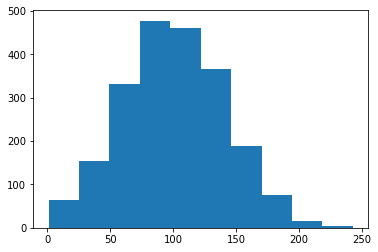

In [12]:
plt.hist(s1)

(array([ 9., 17., 42., 69., 83., 76., 34., 24.,  6.,  2.]),
 array([  1. ,  23.3,  45.6,  67.9,  90.2, 112.5, 134.8, 157.1, 179.4,
        201.7, 224. ]),
 <BarContainer object of 10 artists>)

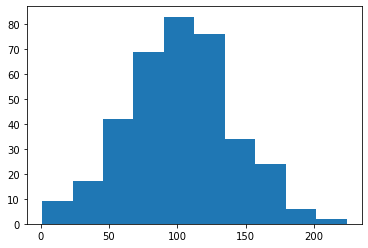

In [13]:
plt.hist(s2)

### EDA

### Univariate analysis

In [14]:
# functions to plot histogram, boxplot for numeric varibales & barplots for categorical variables.

# function to plot histogram
def histogram(df):
    
    plt.hist(df)
    plt.ylabel('Frequency')
    plt.title('Histogram of %s'%df.name)

# function to plot boxplot      
def boxplot(df):
   
    plt.boxplot(df)           
    plt.title('Boxplot of %s'%df.name)

# function to plot barplot
def barplot(df):
    
    plt.figure(figsize = (4,4 ))
    df.value_counts().plot(kind = 'bar')    
    plt.title('Barplot of %s'%df.name)
    plt.show()

#  function to plot graphs for numeric variables  
def plot_numeric_univariate(df):
    count = 0
    nrow = len(df.columns)
    ncol = 2
      
    plt.figure(figsize = (12, nrow*6 ))
    
    for column in df.columns:
        
        count +=1 
        
        # define subplots and their positions in figure
        plt.subplot(nrow, ncol, count)
        histogram(df[column])
        
        count+=1
                
        plt.subplot(nrow, ncol, count)
        boxplot(df[column])
    
    plt.show()
    
# function to plot grpahs for categorical variables   
def plot_disc_univariate(df):
    
    nrow = len(df.columns)
        
    for column in df.columns:  
         barplot(df[column]) 
        

In [15]:
# numeric variable columns
cont_col = ['account_length',  
                    'voice_mail_messages', 
                    'day_mins',
                    'evening_mins', 
                    'night_mins', 
                    'international_mins',
                    'customer_service_calls',
                    'day_calls',
                   'day_charge',
                    'evening_calls',
                    'evening_charge', 
                    'night_calls',
                   'night_charge',
                    'international_calls', 
                    'international_charge',
                   'total_charge']

# categorical variable columns
disc_col = [ 'voice_mail_plan', 
            'international_plan',
           'customer_service_calls']
# target column
tar_col = ['churn']


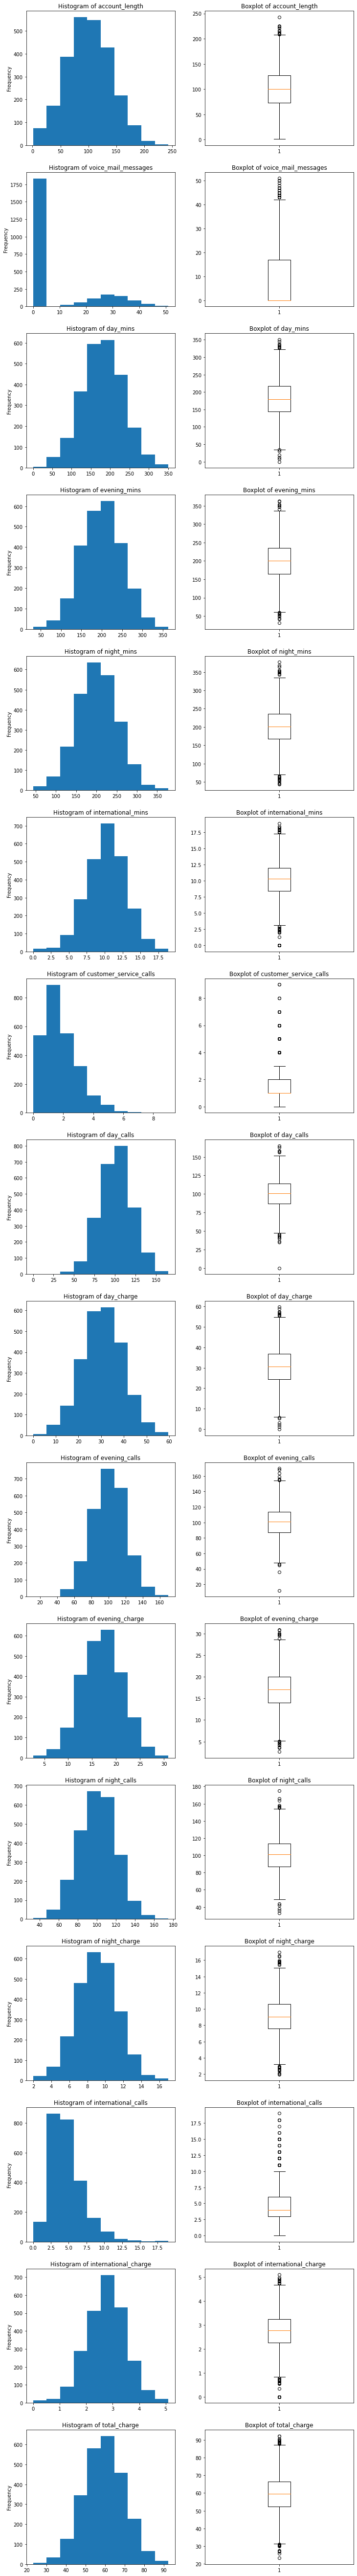

In [16]:
# plotting numeric variable grpahs
plot_numeric_univariate(data_train[cont_col])


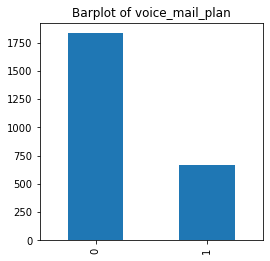

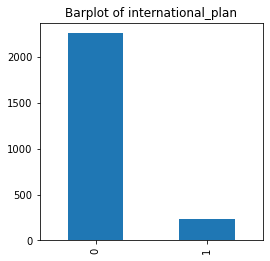

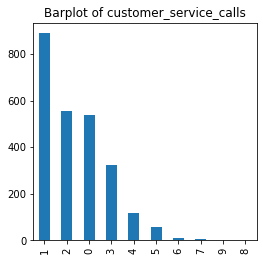

In [17]:
# plotting categorical variable graphs
plot_disc_univariate(data_train[disc_col])

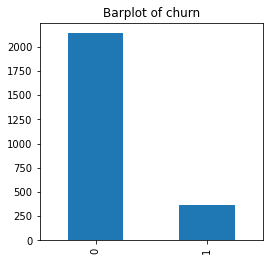

In [18]:
# plotting the target variable distribution

plot_disc_univariate(data_train[tar_col])

In [19]:
#Customers opted for international, voice mail plans are of very less proportion.

for i in data_train[disc_col].columns:
    
    print(i, ":\n", data_train[i].value_counts()/len(data_train))
    print("=======================================")

    

voice_mail_plan :
 0    0.733093
1    0.266907
Name: voice_mail_plan, dtype: float64
international_plan :
 0    0.904762
1    0.095238
Name: international_plan, dtype: float64
customer_service_calls :
 1    0.355342
2    0.221289
0    0.215286
3    0.129252
4    0.047619
5    0.022409
6    0.004802
7    0.002401
9    0.000800
8    0.000800
Name: customer_service_calls, dtype: float64


### Bivariate analysis (predictor wrt target variable)

In [20]:
# function to plot bar graphs(mean.median) of numeric columns wrt Target variable.

def cont_bivariate(df_pred, df_tar):
   
    df = pd.concat([df_pred, df_tar], axis=1)
    nrow = len(df_pred.columns)
    
    count = 0
    nrow = len(df.columns)
    ncol = 2
      
    plt.figure(figsize = (10, nrow*5 ))
    
    for column in df_pred.columns:
        
        count +=1 
        
        # define subplots and their positions in figure
        plt.subplot(nrow, ncol, count)
        df.groupby(df_tar.columns.values[0])[column].median().plot(kind= 'bar', label = 'median', color='green')
        plt.title('%s'%column)
        plt.legend()
        
        count+=1
                
        plt.subplot(nrow, ncol, count)
        df.groupby(df_tar.columns.values[0])[column].mean().plot(kind= 'bar', label = 'mean', color ='blue')
        plt.title('%s'%column)
        plt.legend()
    plt.show()
    #return table_mm


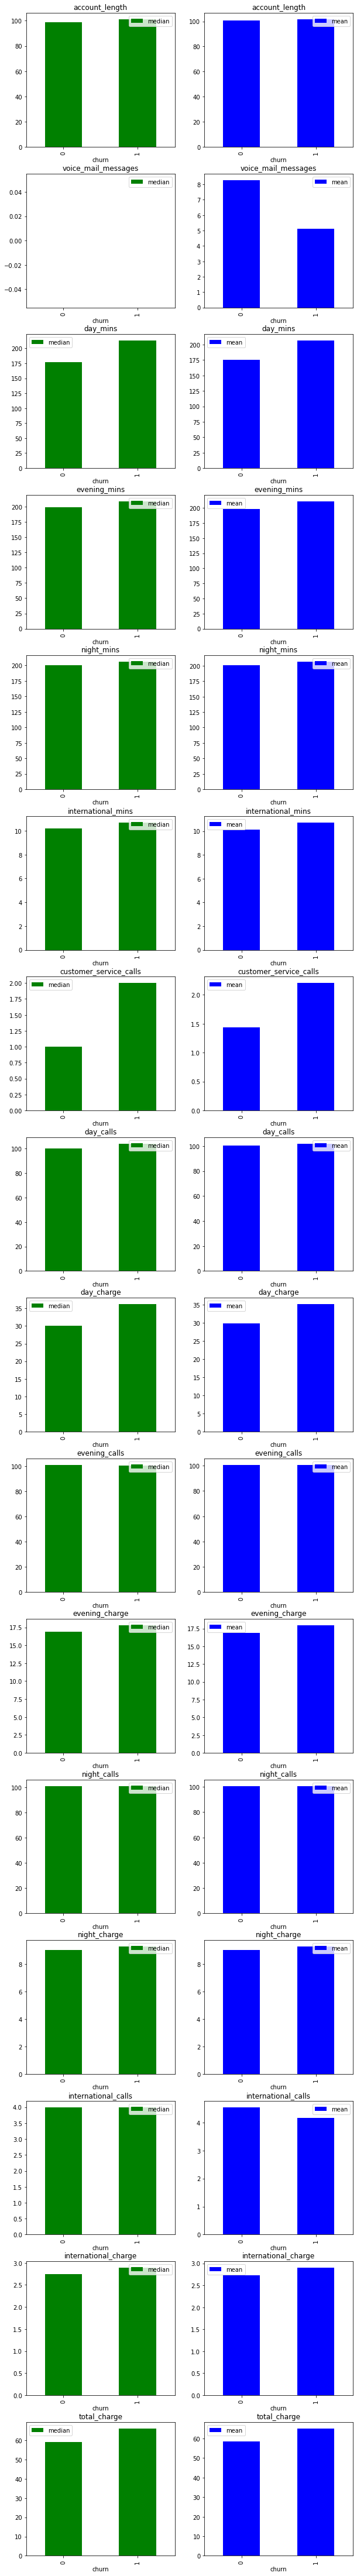

In [21]:
# graphs of continuous variables wrt target variable

cont_bivariate(data_train[cont_col], data_train[tar_col])

<AxesSubplot:xlabel='churn', ylabel='account_length'>

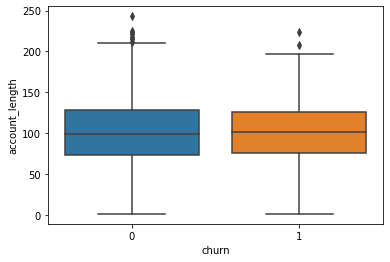

In [22]:
# boxplot for account length vs churn

sns.boxplot(x = data_train['churn'], y = data_train['account_length'])

## both the distributions look similar, except that because of the lesser total observations in churn(1) case 
## may be pulling the average higher than that of churn(0).

In [23]:
# target variable vs continuous variables mean,median table

pd.pivot_table(data_train[cont_col], index = data_train['churn'], aggfunc = (np.mean, np.median))

account_length        customer_service_calls          day_calls         \
                mean median                   mean median        mean median   
churn                                                                          
0         100.573701   99.0               1.436125    1.0  100.274216  100.0   
1         101.535912  101.0               2.204420    2.0  101.944751  104.0   

      day_charge            day_mins        evening_calls         \
            mean  median        mean median          mean median   
churn                                                              
0      29.870075  30.120  175.703042  177.2    100.343940  101.0   
1      35.114199  36.195  206.551657  212.9    100.745856  100.5   

      evening_charge         evening_mins         international_calls         \
                mean  median         mean  median                mean median   
churn                                                                          
0          16.860627  16.920   198.356668  199.00            4.545157    4.0   
1          17.948757  17.785   211.158564  209.25            4.171271    4.0   

      international_charge        international_mins        night_calls  \
                      mean median               mean median        mean   
churn                                                                     
0                 2.731876   2.75          10.116004   10.2  100.394478   
1                 2.899392   2.89          10.736464   10.7  100.715470   

             night_charge         night_mins        total_charge         \
      median         mean median        mean median         mean median   
churn                                                                     
0      101.0     9.032934   9.02  200.729153  200.4    58.495512  59.02   
1      101.0     9.283923   9.26  206.308840  205.8    65.246271  66.17   

      voice_mail_messages         
                     mean median  
churn                             
0                8.285447    0.0  
1                5.104972    0.0

All the predictor continuous varibales have high median,mean for 'churn(1)' customers.
International calls are less for churn(1)customers even though charges are high, which may be examined further.

In [24]:
# pivot table to see the mean,median values of other predicors wrt churn, international_plan.

int_col = ['international_calls','international_mins', 'international_charge']

pd.pivot_table(data_train[int_col], index = [data_train['churn'], data_train['international_plan']], aggfunc = (np.mean, np.median))

international_calls        international_charge  \
                                        mean median                 mean   
churn international_plan                                                   
0     0                             4.517706    4.0             2.735995   
      1                             4.962121    4.0             2.669318   
1     0                             4.281250    4.0             2.785820   
      1                             3.905660    3.0             3.173679   

                                international_mins         
                         median               mean median  
churn international_plan                                   
0     0                   2.750          10.131222  10.20  
      1                   2.730           9.884848  10.10  
1     0                   2.780          10.314844  10.30  
      1                   3.175          11.754717  11.75

Mean values of charges,mins is more for customers chruned(1) than customer churn(0) but it is the opposite for the mean of calls.

<AxesSubplot:xlabel='churn', ylabel='international_calls'>

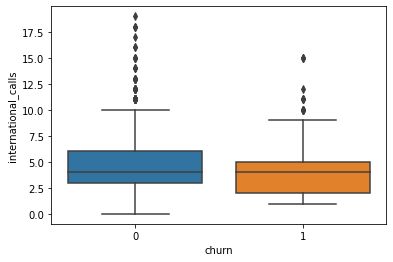

In [25]:
# boxplot for account length vs churn

sns.boxplot(x = data_train['churn'], y = data_train['international_calls'])

All those customers with churn=1, have minimum 1 international call where as customers with churn=0 have 0 no.of calls also. 
The median no.of calls is higher for churn=0 customers.
Also, higher no. of calls are mostly with churn=0 customers. 

<AxesSubplot:>

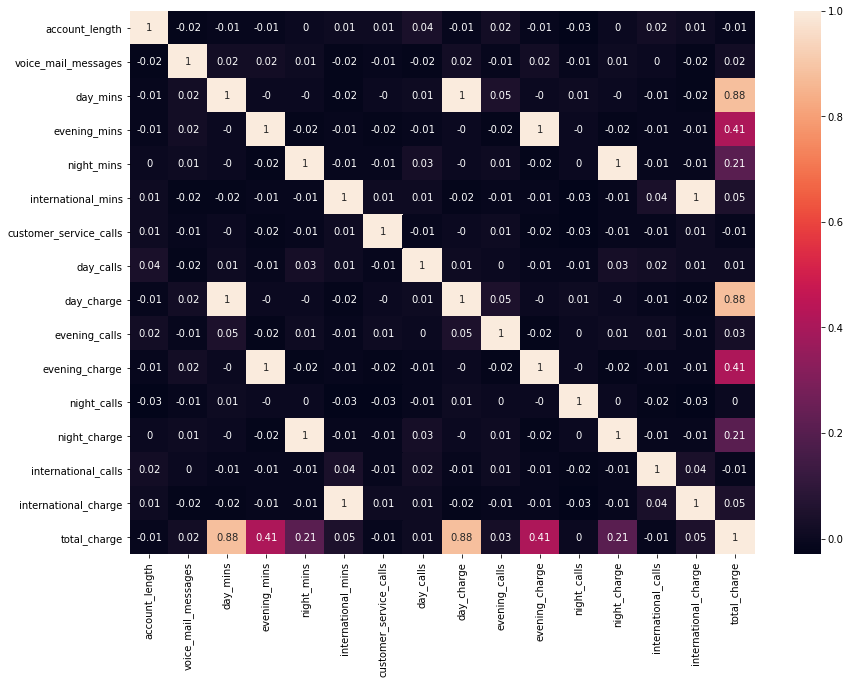

In [26]:
# correlation heatmap among predictor numeric variables

plt.figure(figsize=(14,10))
sns.heatmap(round(data_train[cont_col].corr(),2), annot=True )

As expected, correlation of approx. 1 observed between 'day, evng, night, international charge & no.of mins'.
Also, the total charge is highly correlated to the 'day, evng, night mins &  charges'. 

### EDA observations:

1. Target (churn) class is imbalanced (1-14.5%, 0-85.5%).
2. No null values observed in the data.
3. Statistical tests indicate influence of 'international_plan', 'customer_service_calls', 'voice_mail_plan' on target        variable.
4. Graphs/tables of target wrt variables:  'total_charge', 'international_charge', night_charge', 'evening_charge',            'day_charge','day_mins', 'evening_mins',  'night_mins', 'international_mins', customer_service_calls','day_calls',      'evening_calls', 'night_calls' indicate higher mean  for customers who churn.
5. Variable 'International_calls' indicate lower mean/median for customers who churn.
6. varible 'Account length' does not seem to have influence on churn.
7. High correlation observed for 'total_charge' wrt 6 varibales 'night_charge', 'evening_charge',      'day_charge','day_mins', 'evening_mins',  'night_mins'. 

## Model building

### Logistic Regression

#### Model 1 LR

In [30]:
# imporitng libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score,f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split


In [31]:
# columns for model1 
# The highly multicollinear variables(mins & charges) wrt total charge are dropped. 
# Also, day, evng, night are dropped as EDA does not show very much of influence wrt target.
# The account length variable is dropped as we could not see statistical siginifance of any impact on churn.

columns_LR1 = [ 'voice_mail_plan', 'voice_mail_messages', 'customer_service_calls', 'international_plan', 
               'international_calls', 'international_charge', 'total_charge']
     

# predictor, target separation

X = data_train[columns_LR1]
y = y_train.copy()

# fitting the model

lr1 = LogisticRegression()
lr1.fit(X, y)

# cross validation scores

CV_recall_score = cross_val_score(lr1, X, y, cv=10, scoring = 'recall')
CV_accuracy = cross_val_score(lr1, X, y, cv=10, scoring = 'accuracy')
CV_aucroc_score = cross_val_score(lr1, X, y, cv=10, scoring = 'roc_auc')
CV_f1_score = cross_val_score(lr1, X, y, cv=10, scoring = 'f1')

print('CV Recall:',np.mean(CV_recall_score))
print('CV Accuracy:',np.mean(CV_accuracy))
print('CV roc_auc score:',np.mean(CV_aucroc_score))
print('CV_f1_score:', np.mean(CV_f1_score))

y_pred = lr1.predict(X)

print('Train Recall:',recall_score(y,y_pred))
print('Train Accuracy:',accuracy_score(y,y_pred))
print('confusion matrix:\n',confusion_matrix(y, y_pred, labels= [1, 0]))

CV Recall: 0.22087087087087087
CV Accuracy: 0.8643421686746988
CV roc_auc score: 0.8221251180758223
CV_f1_score: 0.31662942170055464
Train Recall: 0.21823204419889503
Train Accuracy: 0.8639455782312925
confusion matrix:
 [[  79  283]
 [  57 2080]]


The Recall, F1 scores are low, so lets try including the 'day, evng, night calls' columns also to check if the scores improve.

In [32]:
# columns for model2 ( included the day, evening, night calls.)

columns_LR2 = ['voice_mail_plan', 'voice_mail_messages', 'customer_service_calls', 'international_plan', 
         'international_charge', 'total_charge', 'day_calls',  'evening_calls','night_calls', 'international_calls']
    
# predictor, target separation

X = data_train[columns_LR2]
y = y_train.copy()


# fitting the model2

lr2 = LogisticRegression()
lr2.fit(X, y)

# cross validation scores

CV_recall_score = cross_val_score(lr2, X, y, cv=10, scoring = 'recall')
CV_accuracy = cross_val_score(lr2, X, y, cv=10, scoring = 'accuracy')
CV_aucroc_score = cross_val_score(lr2, X, y, cv=10, scoring = 'roc_auc')
CV_f1_score = cross_val_score(lr2, X, y, cv=10, scoring = 'f1')

print('CV Recall:',np.mean(CV_recall_score))
print('CV Accuracy:',np.mean(CV_accuracy))
print('CV roc_auc score:',np.mean(CV_aucroc_score))
print('CV_f1_score:', np.mean(CV_f1_score))

y_pred = lr2.predict(X)

print('\nTrain Recall:',recall_score(y,y_pred))
print('Train Accuracy:',accuracy_score(y,y_pred))
print('confusion matrix:\n',confusion_matrix(y, y_pred, labels= [1, 0]))

CV Recall: 0.20435435435435437
CV Accuracy: 0.8587453815261042
CV roc_auc score: 0.7877188133243156
CV_f1_score: 0.29465967712068813

Train Recall: 0.20165745856353592
Train Accuracy: 0.860344137655062
confusion matrix:
 [[  73  289]
 [  60 2077]]


Addition of columns did not improve scores.
So, Lets try SMOTE to oversample the minority class, undersample the majotity class with the Model-1 predictors.

### Over sampling , undersampling

In [37]:
# libraries
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# oversampling, undersampling proportions combinations checked to select the best combination.
# pipeline is created
# model fitted on each combination
# scores are evaluated to select the best combination.

# Lists for oversample, undersample proportions  
over_samp = [0.20,0.25]
under_samp = [0.25, 0.30, 0.40, 0.50]

# list to store the CV scores
cv_scores = []

for over in over_samp:
    for under in under_samp:
            if under >= over:
                
                # train X, train y separation
                X = data_train[columns_LR1]
                y = y_train.copy()
                
                # oversampling, undersampling
                oversample = BorderlineSMOTE(sampling_strategy = over, random_state = 100)
                undersample = RandomUnderSampler(sampling_strategy=under, random_state = 100)
                
                # pipeline for sampling prior to model building
                steps = [('oversample', oversample), ('undersample', undersample)]
                pipeline = Pipeline(steps=steps)
                X, y = pipeline.fit_resample(X, y)
                
                # model fitting & cross validation scores
                
                lr3 = LogisticRegression()
                lr3.fit(X, y)

                CV_recall_score = cross_val_score(lr3, X, y, cv=10, scoring = 'recall')
                CV_accuracy = cross_val_score(lr3, X, y, cv=10, scoring = 'accuracy')
                CV_aucroc_score = cross_val_score(lr3, X, y, cv=10, scoring = 'roc_auc')
                CV_f1_score = cross_val_score(lr3, X, y, cv=10, scoring = 'f1')
                cv_scores.append((100*over, 100*under, len(y),
                                  round(CV_recall_score.mean(),2),round(CV_accuracy.mean(),2),
                                  round(CV_aucroc_score.mean(),2), round(CV_f1_score.mean(),2) ))

# cv_scores saved as dataframe
scores_df = pd.DataFrame(data=cv_scores, 
                         columns = ["%oversample","%undersample","Xy_len", "recall", "accuracy", "roc_auc", "f1"])

print(scores_df)

   %oversample  %undersample  Xy_len  recall  accuracy  roc_auc    f1
0         20.0          25.0    2135    0.29      0.82     0.80  0.39
1         20.0          30.0    1850    0.34      0.80     0.81  0.44
2         20.0          40.0    1494    0.41      0.77     0.81  0.50
3         20.0          50.0    1281    0.48      0.75     0.81  0.55
4         25.0          25.0    2670    0.26      0.82     0.78  0.36
5         25.0          30.0    2314    0.30      0.79     0.78  0.39
6         25.0          40.0    1869    0.37      0.76     0.78  0.46
7         25.0          50.0    1602    0.43      0.73     0.78  0.51


In [54]:
# libraries
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

# oversampling, undersampling proportions combinations checked to select the best combination.
# pipeline is created
# model fitted on each combination
# scores are evaluated to select the best combination.

# Lists for oversample, undersample proportions  
over_samp = [0.20,0.25, 0.30]
under_samp = [0.35, 0.40]

# list to store the CV scores
cv_scores = []

for over in over_samp:
    for under in under_samp:
            # k value of 1,3,5 for generating syntheic minority class samples using SMOTE         
            for k in range(1,6,2):
                
                # train X, train y separation
                X = data_train[columns_LR1]
                y = y_train.copy()
                
                # oversampling, undersampling
                oversample = BorderlineSMOTE(sampling_strategy = over, k_neighbors=k, random_state = 100)
                undersample = RandomUnderSampler(sampling_strategy=under, random_state = 100)
                
                # pipeline for sampling prior to model building
                steps = [('oversample', oversample), ('undersample', undersample)]
                pipeline = Pipeline(steps=steps)
                X, y = pipeline.fit_resample(X, y)
                
                # stratified kfold

                cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=100)
                
                # model fitting & cross validation scores
                
                lr3 = LogisticRegression()
                lr3.fit(X, y)

                CV_recall_score = cross_val_score(lr3, X, y, cv=cv, scoring = 'recall')
                CV_accuracy = cross_val_score(lr3, X, y, cv=cv, scoring = 'accuracy')
                CV_aucroc_score = cross_val_score(lr3, X, y, cv=cv, scoring = 'roc_auc')
                CV_f1_score = cross_val_score(lr3, X, y, cv=cv, scoring = 'f1')
                cv_scores.append((100*over, k, 100*under, len(y),
                                  round(CV_recall_score.mean(),2),round(CV_accuracy.mean(),2),
                                  round(CV_aucroc_score.mean(),2), round(CV_f1_score.mean(),2) ))

# cv_scores saved as dataframe
scores_df = pd.DataFrame(data=cv_scores, 
                         columns = ["%oversample","k","%undersample","Xy_len", "recall", "accuracy", "roc_auc", "f1"])

print(scores_df)

    %oversample  k  %undersample  Xy_len  recall  accuracy  roc_auc    f1
0          20.0  1          35.0    1647    0.39      0.78     0.82  0.48
1          20.0  3          35.0    1647    0.36      0.78     0.80  0.45
2          20.0  5          35.0    1647    0.36      0.78     0.81  0.46
3          20.0  1          40.0    1494    0.43      0.77     0.82  0.51
4          20.0  3          40.0    1494    0.39      0.77     0.80  0.49
5          20.0  5          40.0    1494    0.40      0.77     0.81  0.49
6          25.0  1          35.0    2059    0.37      0.79     0.80  0.47
7          25.0  3          35.0    2059    0.32      0.77     0.78  0.42
8          25.0  5          35.0    2059    0.34      0.78     0.78  0.44
9          25.0  1          40.0    1869    0.39      0.76     0.80  0.49
10         25.0  3          40.0    1869    0.35      0.75     0.78  0.44
11         25.0  5          40.0    1869    0.37      0.76     0.78  0.47
12         30.0  1          35.0    24

The combination oversampling= 30% undersampling = 40% with k=1 is giving better results than LRmodel1.  
CV Recall: 0.43
CV Accuracy: 0.77
CV roc_auc score: 0.79
CV_f1_score: 0.52

Now, lets try kNN model if scores can be imporved further as it can identify the nearest neighbours and probably can do better job than LR model..

## kNN Model

Lets try KNN model with the same predictors as used in LR model3 as these are found to be highly influencing among all.

   k  recall  accuracy  roc_auc    f1
0  1    0.64      0.91     0.80  0.67
1  3    0.61      0.92     0.87  0.70
2  5    0.56      0.92     0.89  0.68


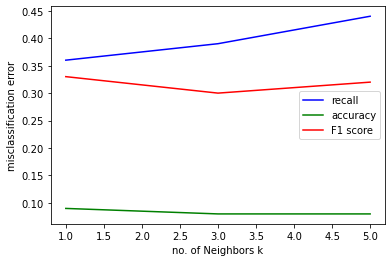

In [89]:
# kNN Model 1:

# importing libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

columns_knn = ['voice_mail_plan', 
 'voice_mail_messages',
 'customer_service_calls',
 'international_plan',         
 'international_calls',             
 'international_charge',
 'total_charge']

# ============== SMOTE, undersampling =============================

# Lists for oversample, undersample proportions  
over_samp = [0.25,0.30]
under_samp = [0.40, 0.50]

# list to store the CV scores
cv_scores = []


# data separation into X, y 
X = data_train[columns_knn]
y = y_train.copy()
                

# data normalization being done as predictos are of different scales.

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = columns_knn)

# no.of nearest neighbors varied from 1 to 15 to check for the best k value.

neighbors= list(range(1,6,2))

# empty list that will hold cv scores

cv_scores = []

# varying the value of k as [1,3,5], fit the kNN model, perform 10-fold cross validation
# scores are captured in the CV_scores list.
                           
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores1  = cross_val_score(knn,X,y,cv=10, scoring = 'recall' )
    scores2 = cross_val_score(knn,X,y,cv=10, scoring = 'accuracy')
    scores3 = cross_val_score(knn,X,y,cv=10, scoring = 'roc_auc')
    scores4 = cross_val_score(knn,X,y,cv=10, scoring = 'f1')
    # scores, k value added as tuples to the list
    cv_scores.append((k,round(scores1.mean(),2),round(scores2.mean(),2),
                                      round(scores3.mean(),2), round(scores4.mean(),2) ))

# cv_scores saved as dataframe
scores_df = pd.DataFrame(data=cv_scores, columns = ["k", "recall", "accuracy", "roc_auc", "f1"])
print(scores_df)


# plotting the misclassification error vs k-value graph
import matplotlib.pyplot as plt
error1 = [1- x[1] for x in cv_scores]
error2 = [1- x[2] for x in cv_scores]
error4 = [1- x[4] for x in cv_scores]
            
plt.plot(neighbors,error1, label= "recall", color= 'blue')
plt.xlabel('no. of Neighbors k')
plt.ylabel('misclassification error')
plt.plot(neighbors,error2, label = 'accuracy', color = 'green')
plt.plot(neighbors,error4, label = 'F1 score', color = 'red')
plt.legend()
plt.show()

The scores are better than LR models.

Among all k values, k=1 is giving better results: recall=0.64,  accuracy=0.91,  roc_auc=0.80,   f1=0.67.

Lets try  BorderlineSMOTE here, to incrase the minority samples near the border and thus minimize the probability of picking up majority class samples near the border.

### kNN model with oversampling(BorderlineSMOTE)

over: 0.25
   k  recall  accuracy  roc_auc    f1
0  1    0.73      0.89     0.83  0.72
1  3    0.69      0.91     0.89  0.75
2  5    0.66      0.90     0.90  0.73


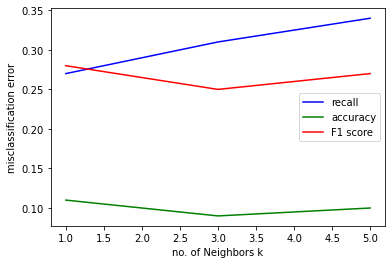

over: 0.3
   k  recall  accuracy  roc_auc    f1
0  1    0.76      0.88     0.84  0.75
1  3    0.70      0.88     0.90  0.73
2  5    0.68      0.89     0.91  0.74


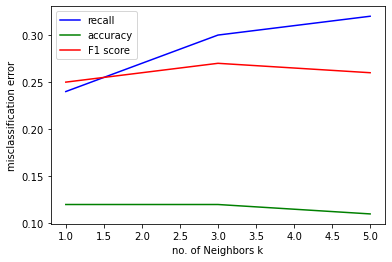

In [98]:
# kNN Model 2:

# importing libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

columns_knn = ['voice_mail_plan', 
 'voice_mail_messages',
 'customer_service_calls',
 'international_plan',         
 'international_calls',             
 'international_charge',
 'total_charge']

# ============== SMOTE =============================

# Lists for oversample proportions  
over_samp = [0.25,0.30]

# list to store the CV scores
cv_scores = []

for over in over_samp:
               
    # data separation into X, y 
    X = data_train[columns_knn]
    y = y_train.copy()
                
    # oversampling, undersampling
    oversample = BorderlineSMOTE(sampling_strategy = over, random_state = 100)
                       
    # pipeline for sampling prior to model building        
    steps = [('oversample', oversample)]
    pipeline = Pipeline(steps=steps)
    X, y = pipeline.fit_resample(X, y)

    # data normalization being done as predictos are of different scales.
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    X = pd.DataFrame(X, columns = columns_knn)

    # no.of nearest neighbors varied as [1,3,5] to check for the best k value.
    neighbors= list(range(1,6,2))

    # empty list that will hold cv scores
    cv_scores = []

    # varying the value of k as [1,3,5], fit the kNN model, perform 10-fold cross validation
    # scores are captured in the CV_scores list.
                           
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores1  = cross_val_score(knn,X,y,cv=10, scoring = 'recall' )
        scores2 = cross_val_score(knn,X,y,cv=10, scoring = 'accuracy')
        scores3 = cross_val_score(knn,X,y,cv=10, scoring = 'roc_auc')
        scores4 = cross_val_score(knn,X,y,cv=10, scoring = 'f1')
                # scores, k value added as tuples to the list
        cv_scores.append((k, round(scores1.mean(),2),round(scores2.mean(),2),
                                      round(scores3.mean(),2), round(scores4.mean(),2) ))

    # cv_scores saved as dataframe
    scores_df = pd.DataFrame(data=cv_scores, columns = ["k", "recall", "accuracy", "roc_auc", "f1"])
    print("over:", over)
    print(scores_df)

    # plotting the misclassification error vs k-value graph
    import matplotlib.pyplot as plt
    error1 = [1- x[1] for x in cv_scores]
    error2 = [1- x[2] for x in cv_scores]
    error4 = [1- x[4] for x in cv_scores]
            
    plt.plot(neighbors,error1, label= "recall", color= 'blue')
    plt.xlabel('no. of Neighbors k')
    plt.ylabel('misclassification error')
    plt.plot(neighbors,error2, label = 'accuracy', color = 'green')
    plt.plot(neighbors,error4, label = 'F1 score', color = 'red')
    plt.legend()
    plt.show()

Among the combinations, oversampling = 0.3 with k=1 giving the better results.  
CV recall = 0.76, accuracy = 0.88, auc_roc = 0.84, f1 =0.75.  
These results are better compared to model1.  
Hence this model will be used for predictions on test data. 

### Predictions on test data using kNN

In [101]:
# using kNN(k=1) with SMOTE ( over sampling =0.3)

# --------------------------------------------------------------------------------------

# train data X,y separation
X = data_train[columns_knn]
y = y_train.copy()

# test data X,y separation
X_test_knn = X_test[columns_knn]
y_test_knn = y_test.copy()

# --------------------------------------------------------------------------------------

# SMOTE oversampling on train data
oversample = BorderlineSMOTE(sampling_strategy = 0.3, random_state = 100)
                
# pipeline for sampling prior to model building
steps = [('oversample', oversample)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X, y)

# data normalization being done as predictors are of different scales.
# train data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = columns_knn)

# test data
scaler = MinMaxScaler()
scaler.fit(X_test_knn)
X_test_knn = scaler.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = columns_knn)

# --------------------------------------------------------------------------------------

# train the model with k=1 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)

# make predictions on test data
pred_test_knn = knn.predict(X_test_knn)

print("==================================")
print('test data- error metrics:kNN')
print('Test Recall:',recall_score(y_test_knn, pred_test_knn))
print('Test Accuracy:',accuracy_score(y_test_knn, pred_test_knn))
print('Test roc_auc score:',roc_auc_score(y_test_knn, pred_test_knn) )
print('Test F1 score:',f1_score(y_test_knn, pred_test_knn))
print("==================================")


test data- error metrics:kNN
Test Recall: 0.6528925619834711
Test Accuracy: 0.8537170263788969
Test roc_auc score: 0.7703452992245546
Test F1 score: 0.5642857142857144


### Predictions on Test data results using kNN:
    
Recall = 0.65  Accuracy= 0.85   AUCROC=  0.77  F1= 0.56.    

Now, lets try Random Forest model as it may be able to handle class imbalances well using 
the hyper-parameter(class_weight) for sample selection while bagging the samples.

## Random forest

### RF model 1:
Lets try the RF model only with class_weight hyperparamter & without undersampling/oversampling the original data.
Also, as the RF models can handle multicollinearity well, all the predictor variables are included as features of X. 

In [102]:
# importing libraries

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [103]:
# all the columns are considered for RF model.

columns_RF1 = ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins','customer_service_calls', 
        'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 
        'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge']


# X & y separation
X = data_train[columns_RF1]
y = y_train.copy()

# RF model fitting using GridsearchCV

RFgrid = RandomForestClassifier(class_weight='balanced_subsample',oob_score=True, random_state=100) 
param_grid = {'n_estimators':[20,50,100],
              'max_features':[4,5,6,8,10] }

# gridsearch parameters

RFmodel1 = GridSearchCV(estimator=RFgrid, param_grid=param_grid, scoring = 'roc_auc', cv=10)

# model fitted on best estimator of gridsearchCV on train data

RFmodel1.fit(X, y)
print(RFmodel1.best_estimator_) 

# train prediction with best parameters of gridsearchCV & scores

CV_recall_score = cross_val_score(RFmodel1.best_estimator_, X, y, cv=10, scoring = 'recall')
CV_accuracy = cross_val_score(RFmodel1.best_estimator_, X, y, cv=10, scoring = 'accuracy')
CV_aucroc_score = cross_val_score(RFmodel1.best_estimator_, X, y, cv=10, scoring = 'roc_auc')
CV_f1_score = cross_val_score(RFmodel1.best_estimator_, X, y, cv=10, scoring = 'f1')

print('CV Recall:',np.mean(CV_recall_score))
print('CV Accuracy:',np.mean(CV_accuracy))
print('CV roc_auc score:',np.mean(CV_aucroc_score))
print('CV f1 score:',np.mean(CV_f1_score))

RandomForestClassifier(class_weight='balanced_subsample', max_features=5,
                       n_estimators=20, oob_score=True, random_state=100)
CV Recall: 0.8063813813813814
CV Accuracy: 0.9719887550200802
CV roc_auc score: 0.9275911639558473
CV f1 score: 0.8919690866639944


As expected, the RF model achieved better scores compared to Logistic regression model & kNN model.  
CV Recall: 0.80, CV Accuracy: 0.97, CV roc_auc score: 0.92, CV f1 score: 0.89.  
Now, lets try removing the 'accountlength' variable as it does not seem to have effect on churn as seen earlier LR model. 

### RF Model 2:

All the columns except 'accountlength' are considered for this RF model2.

In [104]:
# RF Model2 : All the columns except 'accountlength' are considered for this RF model2.

columns_RF2 = ['voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins','customer_service_calls', 
        'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 
        'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge']

# X & y separation
X = data_train[columns_RF2]
y = y_train.copy()

# RF model fitting using GridsearchCV

RFgrid = RandomForestClassifier(class_weight='balanced_subsample',oob_score=True, random_state=100) 
param_grid = {'n_estimators':[20,50,100],
              'max_features':[4,5,6,8,10] }

# gridsearch parameters

RFmodel2 = GridSearchCV(estimator=RFgrid, param_grid=param_grid, scoring = 'roc_auc', cv=10)

# model fitted on best estimator of gridsearchCV on train data

RFmodel2.fit(X, y)
print(RFmodel2.best_estimator_) 

# train prediction with best parameters of gridsearchCV & scores

CV_recall_score = cross_val_score(RFmodel2.best_estimator_, X, y, cv=10, scoring = 'recall')
CV_accuracy = cross_val_score(RFmodel2.best_estimator_, X, y, cv=10, scoring = 'accuracy')
CV_aucroc_score = cross_val_score(RFmodel2.best_estimator_, X, y, cv=10, scoring = 'roc_auc')
CV_f1_score = cross_val_score(RFmodel2.best_estimator_, X, y, cv=10, scoring = 'f1')

print('CV Recall:',np.mean(CV_recall_score))
print('CV Accuracy:',np.mean(CV_accuracy))
print('CV roc_auc score:',np.mean(CV_aucroc_score))
print('CV f1 score:',np.mean(CV_f1_score))

RandomForestClassifier(class_weight='balanced_subsample', max_features=6,
                       n_estimators=20, oob_score=True, random_state=100)
CV Recall: 0.8285285285285285
CV Accuracy: 0.9751887550200802
CV roc_auc score: 0.9253698553430354
CV f1 score: 0.9049344805919327


The achived scores are better than RFmodel1.  
The scores are:CV Recall: 0.82, CV Accuracy: 0.97, CV roc_auc score: 0.92, CV f1 score: 0.90.

So RFmodel2 is giving the best scores out of all, hence will use the same for prediction on test data.

### Predictions on test data

The best model performance(F1 score) is achived with RF model1(with class_weight paramter set to balanced subsample) without any under/over sampling.
So, lets predict using this Model.

In [114]:
# train data X,y separation
X = data_train[columns_RF2]
y = y_train.copy()

# test data X,y separation
X_test_RF = X_test[columns_RF2]
y_test_RF = y_test.copy()


# predictions on test data and scores

pred_test_RF=RFmodel2.best_estimator_.predict(X_test_RF)

print('test data- error metrics:RF')
print('Test Recall:',recall_score(y_test_RF, pred_test_RF))
print('Test Accuracy:',accuracy_score(y_test_RF, pred_test_RF))
print('Test F1score:',f1_score(y_test_RF, pred_test_RF))

test data- error metrics:RF
Test Recall: 0.859504132231405
Test Accuracy: 0.9796163069544365
Test F1score: 0.9244444444444445


### Test predition results:

**Test Recall: 0.859**   
**Test Accuracy: 0.979**  
**Test F1score: 0.924**

### Feature importance using Random Forest model

In [115]:
# feature importance 

df_features = pd.DataFrame((rsearch.best_estimator_.feature_importances_), columns = ['imp'], 
                           index = (columns_RF2))

df_features.sort_values('imp', ascending=False)


,imp
total_charge,0.204390
customer_service_calls,0.178858
international_plan,0.131051
day_charge,0.077583
day_mins,0.062768
international_calls,0.042781
international_mins,0.037010
international_charge,0.031165
evening_charge,0.030903
day_calls,0.030365


So the Top 3 features in predciting the customers churn are:   
1)total_charge  
2)customer_service_calls  
3)international_plan    